In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline
import csv 

from sklearn.model_selection import train_test_split


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


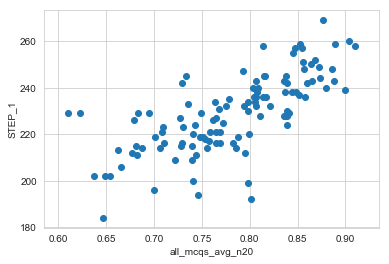

In [85]:
#  loading the data set 
file = pd.read_csv('BSOM_DataSet_for_HW2.csv')
# to check whether there are any empty values or not 
df=file[['all_mcqs_avg_n20','STEP_1']]

df.isnull().any()


df.fillna(df['STEP_1'].mean(), inplace=True)

df.isnull().any()

# seperating the data into independedent variables and target varibles


X = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

target=df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column


print(type(X))
print(type(target))
plt.scatter(X, target)
plt.xlabel('all_mcqs_avg_n20')
plt.ylabel('STEP_1')
plt.show()

## splitting the data 

In [86]:


X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.30,random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(35, 1)
(80, 1)
(35, 1)


## 1.a Gradient descent 

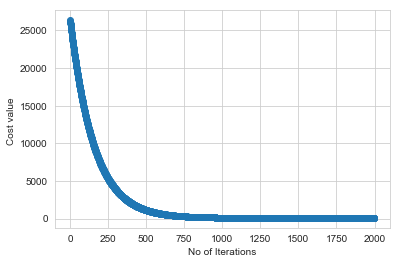

In [87]:


def gD(X, y, theta1, theta0,epochs,l_r):
    N = float(len(y))
    th1=[]
    th0=[]
    cost_all=[]
    for i in range(epochs):
        y_curr = (theta1 * X) + theta0
          
        cost = sum([data**2 for data in (y-y_curr)]) / (2*N)
        cost_all.append(cost)
          
        m_grad = -(2/N) * sum(X * (y - y_curr))
        b_grad = -(2/N) * sum(y - y_curr)
          
        theta1 = theta1 - (l_r * m_grad)
        th1.append(theta1)
         
        theta0 = theta0 - (l_r * b_grad)
        th0.append(theta0)
            
     
          
    return theta1,theta0,cost_all,y_curr

theta_1,theta_0,costAll,y_current1 =gD(X_train,y_train,0,0,2000,0.001)

#print(theta_1)
#print(theta_0)


myarray = np.asarray(costAll)

#print(myarray)
i=np.arange(len(myarray))
plt.scatter(i,myarray)
plt.xlabel('No of Iterations')
plt.ylabel('Cost value ')
plt.plot(i,myarray)

plt.show()



In [88]:
#len(y_current1)

In [89]:
# y predicted values 

def y_predictedValues(X,th1, th0):
    N = float(len(X))
    y_current = (th1 * X) + th0
    return y_current


In [90]:
y_pred=y_predictedValues(X_test,theta_1,theta_0)


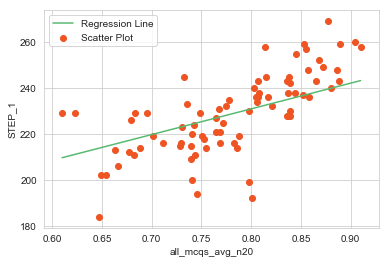

In [91]:

# Plotting Values and Regression Line

max_x = np.max(X_train) 
min_x = np.min(X_train) 

# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = theta_0 + theta_1 * x

#print('b0, b1',b0,b1)
# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X_train, y_train, c='#ef5423', label='Scatter Plot')

plt.xlabel('all_mcqs_avg_n20')
plt.ylabel('STEP_1')
plt.legend()
plt.show()

## 1. b Mean Squared Error

In [92]:
def mse(y_true,y_Pred):
    mse=1/len(y_true)*np.sum(np.subtract(y_true,y_Pred)**2)
    
    return mse



## R_square

In [93]:
def r_square(y_true,y_Pred):
   # y -ypred whole square 
    #y- mean of y whole square 
    r2= 1- (np.sum(np.subtract(y_true,y_Pred)**2)/np.sum(np.subtract(y_true,np.mean(y_true))**2))
    return r2
    
    

## Pearson

In [94]:
import statistics  as s
def prsn_cef(y_test,y_pred):
    df_1=pd.DataFrame(y_test)
    df_2 = pd.DataFrame(y_pred)            

    result = pd.concat([df_1, df_2], axis=1)#.reindex(df_1.index)
    prsn=(result.iloc[:,0].cov(result.iloc[:,1]))/(s.stdev(result.iloc[:,0])*s.stdev(result.iloc[:,1]))
    
    return prsn



In [95]:
mse_cal=mse(y_test, y_pred)

print('MSE for single variable  is :',mse_cal)

r_2=r_square(y_test, y_pred)

print('r_2value for single variable is ',r_2)
psn=prsn_cef(y_test,y_pred)
print('Pearson Correaltion coefficient: ',psn )


MSE for single variable  is : 103.33301599088588
r_2value for single variable is  0.4792239778955706
Pearson Correaltion coefficient:  0.7382282395489072
